# Import Data

In [1]:
import pandas as pd

df = pd.read_csv('data.csv')

# Assign dependent & Independent values, drop columns we don't need
y = df['Purchase']
x = df.drop(columns=['SUS', 'Unnamed: 6', 'Purchase'])

# Check if there is any missing values
x.isna().sum()

Duration        0
Gender          0
ASR_Error       0
Intent_Error    0
dtype: int64

In [2]:
# Prepare label and data
y = y.to_numpy()
x = x.to_numpy()

## Prepare and Split Data

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

scale = StandardScaler()
scaled_x = scale.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

lr = LogisticRegression()

# Train Model
lr.fit(x_train, y_train)

# Test Logistic Regression Model
y_pred_lr = lr.predict(x_test)
y_pred_lr_proba = lr.predict_proba(x_test)

## Show Evaluation Metrics of Logistic Regression Model

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.88      1.00      0.93        14

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30



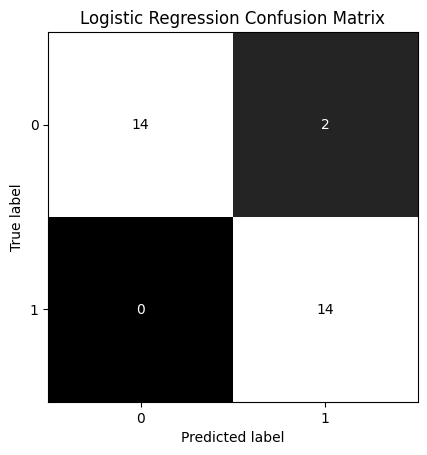

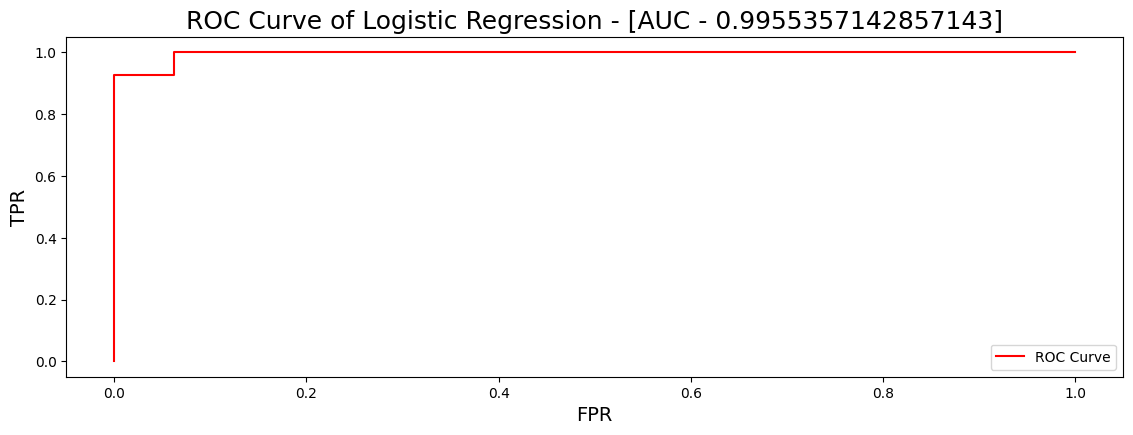

In [5]:
import matplotlib.pyplot as plt

# Print classification report
print(classification_report(y_test, y_pred_lr))

# Show Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), y_pred_lr))
disp.plot(
        include_values = True,
        cmap = 'gray',
        colorbar = False
)
disp.ax_.set_title("Logistic Regression Confusion Matrix")

# Show ROC Curve
plt.figure(figsize=(30,15))
plot_index = 1

fpr, tpr, threshold = roc_curve(y_test, y_pred_lr_proba[:, 1])
auc_score = auc(fpr, tpr)
plt.subplot(3, 2, plot_index)
plt.plot(fpr, tpr, 'r', label = "ROC Curve")
plt.title(f"ROC Curve of Logistic Regression - [AUC - {auc_score}]", fontsize = 18)
plt.xlabel('FPR', fontsize=14)
plt.ylabel('TPR', fontsize=14)
plt.legend()
plt.show()

# Other Models - SVM, Naive Bayes, Random Forest

In [6]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
# Why true?
svc = SVC(probability=True)

nb = GaussianNB()
rfc = RandomForestClassifier()

# Train Models
svc.fit(x_train, y_train)
nb.fit(x_train, y_train)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [7]:
# Test Models
y_pred_svc = svc.predict(x_test)
y_pred_svc_proba = svc.predict_proba(x_test)

y_pred_nb = nb.predict(x_test)
y_pred_nb_proba = nb.predict_proba(x_test)

y_pred_rfc = rfc.predict(x_test)
y_pred_rfc_proba = rfc.predict_proba(x_test)

## Model Evaluations with Confusion Matrix and ROC Curve

Support Vector Machine
              precision    recall  f1-score   support

           0       0.62      0.50      0.55        16
           1       0.53      0.64      0.58        14

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.57        30
weighted avg       0.58      0.57      0.57        30

Naive Bayes Classifier
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
wei

<Figure size 6000x3000 with 0 Axes>

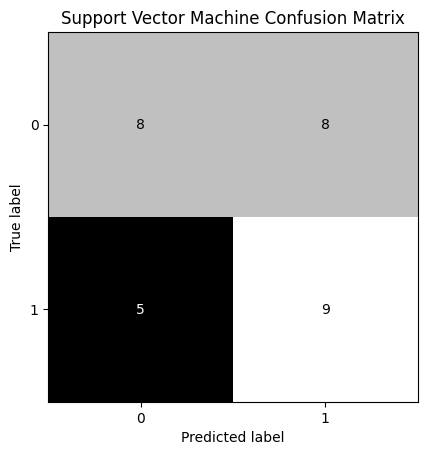

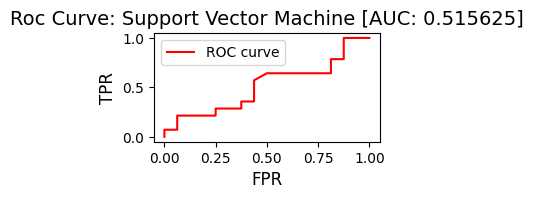

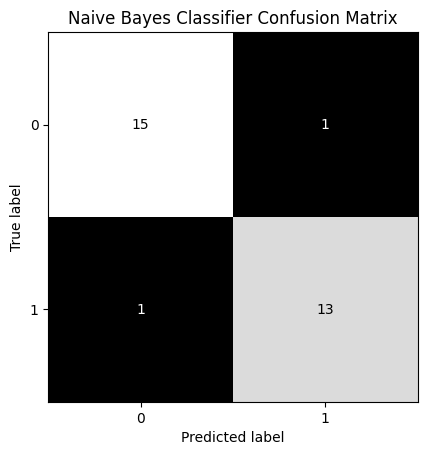

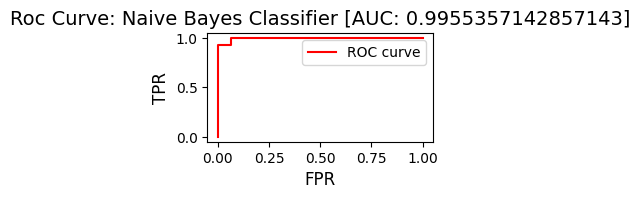

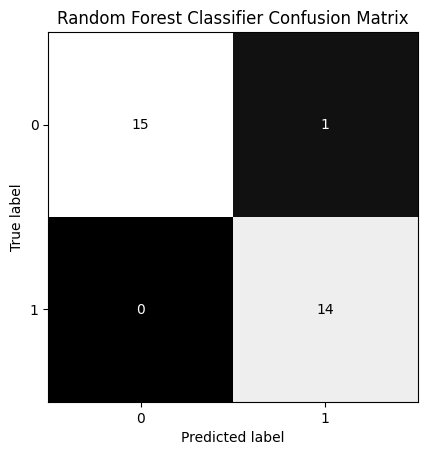

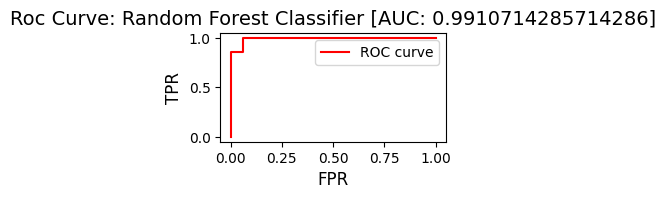

In [8]:
# Show Classification reports
print("Support Vector Machine")
print(classification_report(y_test, y_pred_svc))
print("Naive Bayes Classifier")
print(classification_report(y_test, y_pred_nb))
print("Random Forest Classifier")
print(classification_report(y_test, y_pred_rfc))

# Show Confusion Matrix and ROC Curves
models = ['Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_pred_svc, y_pred_nb, y_pred_rfc]
pred_probabilities = [y_pred_svc_proba, y_pred_nb_proba, y_pred_rfc_proba]

plt.figure(figsize=(60,30))
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")
    disp.plot(colorbar=False)
    
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.clf()
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    plt.title(f'Roc Curve: {model} [AUC: {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()